In [47]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import h5py

In [60]:
df = pd.read_csv\
('/green-projects/project-sonyc_redhook/workspace/share/redhook-analysis/output/max_dataframe_cut.csv')

In [61]:
df.head()

,Unnamed: 0,start_timestamp,frame,actual_timestamp,area,probability
0,10,1573061868,648,1573061911,276490,0.988503
1,32,1573830164,72,1573830168,207648,0.995947
2,45,1573830164,1518,1573830265,294148,0.969995
3,64,1573830554,72,1573830558,103700,0.983073
4,70,1573830554,190,1573830566,122512,0.977682


In [50]:
def show_frame(video_file, frame_number):
    vid_obj = cv2.VideoCapture(video_file)
    vid_obj.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    res, frame = vid_obj.read()
    if res:
        cropped_frame = frame[200:850, 1100:1750]
        return cropped_frame
    else:
        return False

In [ ]:
img_arr = [show_frame('/green-projects/project-sonyc_redhook/workspace/share/original_video/' \
               + str(int(df.iloc[x]['start_timestamp'])) + '.ts', df.iloc[x]['frame']) for x in df.index]

In [70]:
h5 = h5py.File\
('/green-projects/project-sonyc_redhook/workspace/share/redhook-analysis/output/max_img.hdf5', 'r')

In [80]:
list(h5.keys())

['max_img']

In [82]:
max_img = h5['max_img']

In [184]:
def switch_color(img):
    """
    Switches the colors of an image from BGR format to RGB format.
    
    Parameters
    ----------
    img : ndarray
        An array representing an image, of the shape (x, x, 3). The array is in BGR format. 
        
    Returns
    -------
    switched_img : ndarray
        An array representing an image, of the shape (x, x, 3). The array is in RGB format.
    """
    #cv2 images are in bgr order, need to convert to rgb
    for i in range(len(img)):
        for j in range(len(img)):
            rgb_arr = img[:][i][j]
            #swapping r with b
            rgb_arr[0], rgb_arr[2] = rgb_arr[2], rgb_arr[0]
    return switched_img

In [220]:
def annotate_img(img_arr, idx_arr, annotation_list):
    """
    Displays an interface for annotating images to indicate whether there is a truck or not. The function
    then stores the annotations and the respective indices of the images in an array.
    
    Parameters
    ----------
    img_arr : array
        Array containing the image array inside. The image array should be in the 5th column of img_arr.
        
    idx_arr : array
        Array containing the indices of img_arr to display for annotation. 
        
    annotation_list : array
        Array to append both the annotations for the images and the indices of the images in img_arr.
    """
    for i in idx_arr:
        img = img_arr[i][5]
        #display img
        plt.imshow(switch_color(img))
        plt.show()
        #truck or no?
        annotation = input("Press y if the image shows a truck, and n if not: ")
        #add answer to annotation_list
        annotation_list.append([i, annotation])

In [221]:
test_annotation_list = []

In [224]:
# annotate_img(max_img, [0, 1, 2], test_annotation_list)

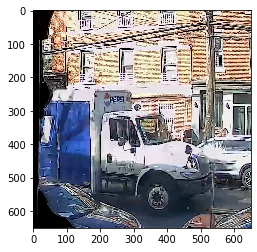

In [202]:
plt.imshow(switch_color(max_img[1][5]))